In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
from tensorflow.keras.utils import normalize

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [7]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [8]:
input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation='relu')(input_)
hiden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_, hidden1])
output = Dense(1)(concat)

model = Model(inputs=[input_], outputs=[output])

In [9]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [11]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30, batch_size=40, verbose=1)

Epoch 1/30
310/310 [==============================] - 7s 4ms/step - loss: 2.1274 - mse: 2.1274 - val_loss: 1.3776 - val_mse: 1.3776
Epoch 2/30
310/310 [==============================] - 1s 3ms/step - loss: 1.3189 - mse: 1.3189 - val_loss: 1.3624 - val_mse: 1.3624
Epoch 3/30
310/310 [==============================] - 1s 3ms/step - loss: 1.3079 - mse: 1.3079 - val_loss: 1.3531 - val_mse: 1.3531
Epoch 4/30
310/310 [==============================] - 1s 4ms/step - loss: 1.3005 - mse: 1.3005 - val_loss: 1.3442 - val_mse: 1.3442
Epoch 5/30
310/310 [==============================] - 2s 5ms/step - loss: 1.2933 - mse: 1.2933 - val_loss: 1.3366 - val_mse: 1.3366
Epoch 6/30
310/310 [==============================] - 1s 4ms/step - loss: 1.2850 - mse: 1.2850 - val_loss: 1.3270 - val_mse: 1.3270
Epoch 7/30
310/310 [==============================] - 1s 3ms/step - loss: 1.2763 - mse: 1.2763 - val_loss: 1.3236 - val_mse: 1.3236
Epoch 8/30
310/310 [==============================] - 1s 3ms/step - loss: 1.

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 1)            39          ['concatenate[0][0]']        

In [13]:
test_loss = model.evaluate(X_test, y_test)
test_loss

162/162 [==============================] - 0s 2ms/step - loss: 0.9499 - mse: 0.9499


[0.9499022364616394, 0.9499022364616394]

In [16]:
y_pred = model.predict(X_test[:5])
y_pred.round(2)

1/1 [==============================] - 0s 21ms/step


array([[1.98],
       [2.18],
       [1.93],
       [1.98],
       [2.  ]], dtype=float32)

In [15]:
y_test[:5]

array([1.633, 3.667, 0.935, 0.831, 1.408])

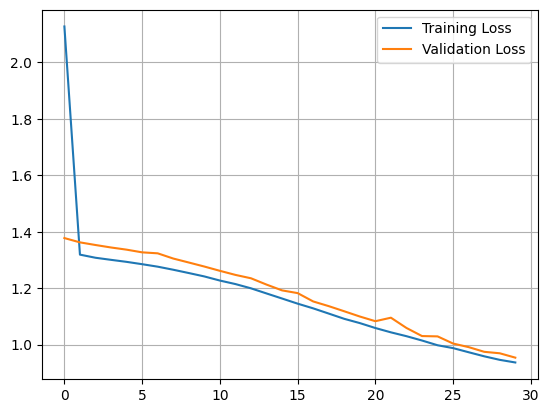

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.grid()
plt.legend(loc='best')
plt.show()